In [7]:
# https://www2.hawaii.edu/~jonghyun/classes/S18/CEE696/files/08_scipy_optimize2.pdf

In [8]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt

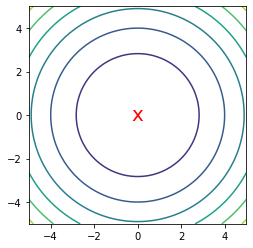

In [9]:
def func(x):
  """2D function x^2 + y^2"""
  return x[0]**2 + x[1]**2

x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X,Y = np.meshgrid(x,y) # meshgrid
XY = np.vstack([X.ravel(), Y.ravel()]) # 2D to 1D vertically
Z = func(XY).reshape(50,50) # back to 2D
plt.contour(X, Y, Z) # plot contour
plt.text(0, 0, 'x', va='center', ha='center',
color='red', fontsize=20)
plt.gca().set_aspect('equal', adjustable='box')#equal axis
plt.show()

In [10]:
def func_grad(x):
  '''derivative of x^2 + y^2'''
  grad = np.zeros_like(x)
  grad[0] = 2*x[0]
  grad[1] = 2*x[1]
  return grad


def func_hess(x):
  '''hessian of x^2 + y^2 '''
  n = np.size(x) # we assume this a n x 1 or 1 x n vec
  hess = np.zeros((n,n),'d')
  hess[0,0] = 2.
  hess[1,0] = 0.
  hess[0,1] = 0.
  hess[1,1] = 2.
  return hess

In [11]:
def reporter(x):
  """Capture intermediate states of optimization"""
  global xs
  xs.append(x)
  x0 = np.array([2.,2.])
  xs = [x0]
  opt.minimize(func,x0,jac=func_grad,callback=reporter)
  #opt.minimize(func,x0,jac=func_grad,hess=func_hess,
  # callback=reporter)
  xs = np.array(xs)
  plt.figure()
  plt.contour(X, Y, Z, np.linspace(0,25,50))
  plt.text(0, 0, 'x', va='center', ha='center',
  color='red', fontsize=20)
  plt.plot(xs[:, 0], xs[:, 1], '-o')
  plt.gca().set_aspect('equal', adjustable='box')
  plt.show()

In [12]:
def func(x):
  """2D function 5*x^2 + y^2"""
  return 5*x[0]**2 + x[1]**2

def func_grad(x):
  '''derivative of 5*x^2 + y^2'''
  grad[0] = 10*x[0]

def func_hess(x):
  '''hessian of 5*x^2 + y^2 '''
  hess[0,0] = 10.
